In [1]:
import sys
default_stdout = sys.stdout
default_stderr = sys.stderr
reload(sys)
sys.setdefaultencoding("utf-8")
sys.stdout = default_stdout
sys.stderr = default_stderr

In [2]:
%load_ext autoreload
%autoreload 2

import sys 
from os import getcwd, path
sys.path.append(path.dirname(getcwd()))
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import pandas as pd
%matplotlib inline

In [3]:
from utils import data

In [4]:
cohort = data.init_cohort(exclude_patient_ids=set(),
                          only_patients_with_bams=False)

{'dataframe_hash': -9059328030452674214,
 'provenance_file_summary': {u'cohorts': u'0.4.0+3.gda968fb',
                             u'isovar': u'0.0.6',
                             u'mhctools': u'0.3.0',
                             u'numpy': u'1.11.1',
                             u'pandas': u'0.18.1',
                             u'pyensembl': u'1.0.3',
                             u'scipy': u'0.18.1',
                             u'topiary': u'0.1.0',
                             u'varcode': u'0.5.10'}}


In [5]:
mo_3_boolean_label = "Overall Survival"
mo_3_boolean_value_map = {True: "> 3 Months", False: "≤ 3 Months"}

In [6]:
df = cohort.as_dataframe()
less_3_mos_ids = set(df[~df.is_late_deceased].patient_id)
cohort_greater_3_mos = data.init_cohort(
    only_patients_with_bams=False, exclude_patient_ids=less_3_mos_ids)

{'dataframe_hash': 9021847847770784199,
 'provenance_file_summary': {u'cohorts': u'0.4.0+3.gda968fb',
                             u'isovar': u'0.0.6',
                             u'mhctools': u'0.3.0',
                             u'numpy': u'1.11.1',
                             u'pandas': u'0.18.1',
                             u'pyensembl': u'1.0.3',
                             u'scipy': u'0.18.1',
                             u'topiary': u'0.1.0',
                             u'varcode': u'0.5.10'}}


In [7]:
from cohorts.functions import *

In [8]:
# Clinical factors

In [9]:
def late_deceased(row):
    return row["patient_id"] not in less_3_mos_ids

In [10]:
from utils.paper import *

Liver Met         False  True 
Overall Survival              
> 3 Months           18      5
≤ 3 Months            0      6
Fisher's Exact Test: OR: inf, p-value=0.000972590627763 (two-sided)
{{{late_deceased_liver_plot}}}
{{{late_deceased_liver_late_deceased:22%}}}
{{{late_deceased_liver_no_late_deceased:100%}}}
{{{late_deceased_liver_fishers:n=29, Fisher's Exact p=0.00097}}}


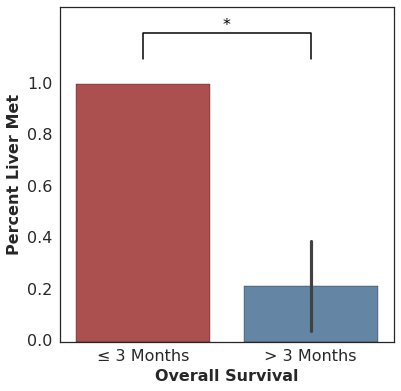

In [11]:
fishers_exact_hyper_label_printer(cohort.plot_boolean(on={"Liver Met": lambda row: row["Liver Mets"] == 1, "> 3 Months OS": late_deceased},
                    plot_col="Liver Met",
                    boolean_label=mo_3_boolean_label,
                    boolean_value_map=mo_3_boolean_value_map,
                    boolean_col="> 3 Months OS"), "late_deceased_liver", split_col="late_deceased")

Missing 5-Factor Score for 3 patients: from 29 to 26


Mann-Whitney test: U=22.0, p-value=0.0177410474356 (two-sided)
{{{late_deceased_five_factor_plot}}}
{{{late_deceased_five_factor_late_deceased:1.50 (range 0.00-4.00)}}}
{{{late_deceased_five_factor_no_late_deceased:3.00 (range 2.00-4.00)}}}
{{{late_deceased_five_factor_mw:n=26, Mann-Whitney p=0.018}}}


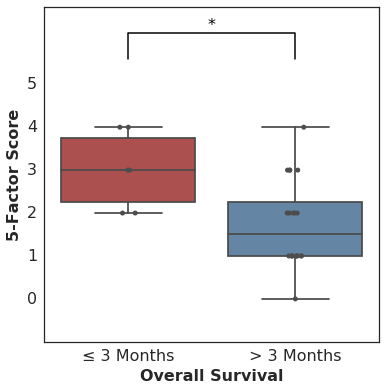

In [12]:
mann_whitney_hyper_label_printer(cohort.plot_boolean(on={"5-Factor Score": lambda row: row["5-factor score"], "> 3 Months OS": late_deceased},
                    plot_col="5-Factor Score",
                    boolean_label=mo_3_boolean_label,
                    boolean_value_map=mo_3_boolean_value_map,
                    boolean_col="> 3 Months OS"), label="late_deceased_five_factor", split_col="late_deceased")

Prior BCG         False  True 
Overall Survival              
> 3 Months           15      8
≤ 3 Months            2      4
Fisher's Exact Test: OR: 3.75, p-value=0.198063239443 (two-sided)
{{{late_deceased_bcg_plot}}}
{{{late_deceased_bcg_late_deceased:35%}}}
{{{late_deceased_bcg_no_late_deceased:67%}}}
{{{late_deceased_bcg_fishers:n=29, Fisher's Exact p=0.20}}}


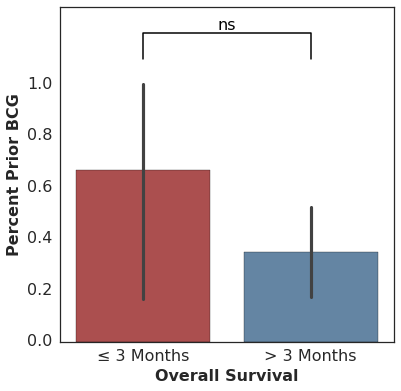

In [13]:
fishers_exact_hyper_label_printer(cohort.plot_boolean(on={"Prior BCG": lambda row: row["Prior BCG"] == "Y", "> 3 Months OS": late_deceased},
                    plot_col="Prior BCG",
                    boolean_label=mo_3_boolean_label,
                    boolean_value_map=mo_3_boolean_value_map,
                    boolean_col="> 3 Months OS"), label="late_deceased_bcg", split_col="late_deceased")

In [14]:
cohort = data.init_cohort(exclude_patient_ids=set(),
                          only_patients_with_bams=False,
                          join_with="tcr_peripheral_a")

inner join with tcr_peripheral_a: 29 to 29 rows
inner join with tcr_peripheral_a: 29 to 29 rows
{'dataframe_hash': -8062678075537494193,
 'provenance_file_summary': {u'cohorts': u'0.4.0+3.gda968fb',
                             u'isovar': u'0.0.6',
                             u'mhctools': u'0.3.0',
                             u'numpy': u'1.11.1',
                             u'pandas': u'0.18.1',
                             u'pyensembl': u'1.0.3',
                             u'scipy': u'0.18.1',
                             u'topiary': u'0.1.0',
                             u'varcode': u'0.5.10'}}


inner join with tcr_peripheral_a: 29 to 29 rows


Mann-Whitney test: U=40.0, p-value=0.124934124517 (two-sided)
{{{late_deceased_tcr_plot}}}
{{{late_deceased_tcr_late_deceased:0.068 (range 0.022-0.35)}}}
{{{late_deceased_tcr_no_late_deceased:0.15 (range 0.082-0.22)}}}
{{{late_deceased_tcr_mw:n=29, Mann-Whitney p=0.12}}}


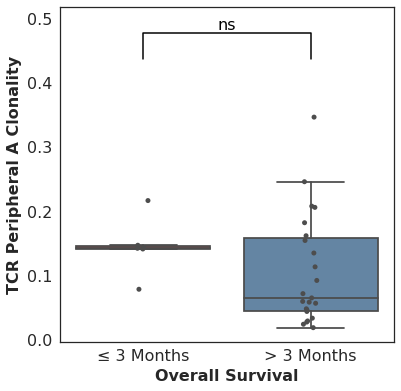

In [15]:
mann_whitney_hyper_label_printer(cohort.plot_boolean(on={"TCR Peripheral A Clonality": lambda row: row["Clonality"], "> 3 Months OS": late_deceased},
                    plot_col="TCR Peripheral A Clonality",
                    boolean_label=mo_3_boolean_label,
                    boolean_value_map=mo_3_boolean_value_map,
                    boolean_col="> 3 Months OS"), "late_deceased_tcr", split_col="late_deceased")

In [16]:
df_clonality_benefit = cohort.as_dataframe(on=late_deceased)[["Clonality", "benefit", "late_deceased"]]

inner join with tcr_peripheral_a: 29 to 29 rows


In [17]:
df_clonality_benefit[~df_clonality_benefit.late_deceased]

,Clonality,benefit,late_deceased
0,0.149980,False,False
2,0.081610,False,False
3,0.145239,False,False
5,0.219364,False,False
12,0.146469,False,False
27,0.144153,False,False


In [18]:
df_clonality_benefit[~df_clonality_benefit.late_deceased].median()

Clonality        0.145854
benefit          0.000000
late_deceased    0.000000
dtype: float64

In [19]:
cohort = data.init_cohort()

{'dataframe_hash': -2899676230513618006,
 'provenance_file_summary': {u'cohorts': u'0.4.0+3.gda968fb',
                             u'isovar': u'0.0.6',
                             u'mhctools': u'0.3.0',
                             u'numpy': u'1.11.1',
                             u'pandas': u'0.18.1',
                             u'pyensembl': u'1.0.3',
                             u'scipy': u'0.18.1',
                             u'topiary': u'0.1.0',
                             u'varcode': u'0.5.10'}}


inner join with ensembl_coverage: 25 to 25 rows


Mann-Whitney test: U=33.0, p-value=0.262307331029 (two-sided)
{{{late_deceased_missense_plot}}}
{{{late_deceased_missense_late_deceased:0.98 (range 0.019-11.46)}}}
{{{late_deceased_missense_no_late_deceased:4.24 (range 0.094-9.90)}}}
{{{late_deceased_missense_mw:n=25, Mann-Whitney p=0.26}}}


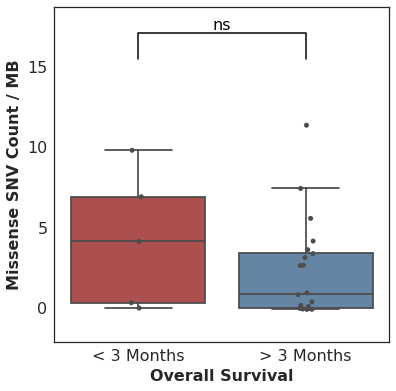

In [20]:
mann_whitney_hyper_label_printer(cohort.plot_boolean(on={"Missense SNV Count / MB": missense_snv_count,
                                                         "> 3 Months OS": late_deceased},
                                                     plot_col="Missense SNV Count / MB", boolean_col="> 3 Months OS",
                                                     boolean_label="Overall Survival",
                                                     boolean_value_map={True: "> 3 Months", False: "< 3 Months"}),
                                 "late_deceased_missense", split_col="late_deceased")